# Explore CDOM in L23

In [1]:
# imports

from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
from datetime import datetime, time
import random 

import pandas
import seaborn as sns

from oceancolor.tara import io as tara_io
from oceancolor.ph import pigments
from oceancolor.hydrolight import loisel23

from cnmf.oceanography import iops
from cnmf import zhu_nmf as nmf
from cnmf import io as cnmf_io

In [2]:
%matplotlib ipympl

# Load

## NMF

In [3]:
nmf_fit = 'L23'
N_NMF, iop = 4, 'a'
d_L23 = cnmf_io.load_nmf(nmf_fit, N_NMF, iop)
L23_M = d_L23['M']
L23_coeff = d_L23['coeff']
L23_NMF_wave = d_L23['wave']

Loading: /home/xavier/Projects/Oceanography/python/cnmf/cnmf/data/L23/L23_NMF_04_a.npz


### Hydro

In [4]:
ds = loisel23.load_ds(4,0)
ds

<xarray.Dataset>
Dimensions:  (Lambda: 81, IOP_Scenario: 3320)
Coordinates:
  * Lambda   (Lambda) float32 350.0 355.0 360.0 365.0 ... 740.0 745.0 750.0
Dimensions without coordinates: IOP_Scenario
Data variables: (12/17)
    Rrs      (IOP_Scenario, Lambda) float32 0.01176 0.01201 ... 3.041e-05
    Ed_0+    (IOP_Scenario, Lambda) float32 0.7753 0.7314 0.7207 ... 1.237 1.222
    Lw       (IOP_Scenario, Lambda) float32 0.009118 0.008785 ... 3.716e-05
    Lu_0+    (IOP_Scenario, Lambda) float32 0.04075 0.03903 ... 0.06316 0.0624
    a        (IOP_Scenario, Lambda) float32 0.03096 0.02925 ... 2.83 2.85
    anw      (IOP_Scenario, Lambda) float32 0.02386 0.02245 ... 0.0005 0.0004
    ...       ...
    bph      (IOP_Scenario, Lambda) float32 0.04521 0.04454 ... 0.1013 0.1008
    bd       (IOP_Scenario, Lambda) float32 0.03323 0.03239 ... 0.03532 0.03513
    bb       (IOP_Scenario, Lambda) float32 0.006968 0.006587 ... 0.001876
    bbnw     (IOP_Scenario, Lambda) float32 0.00105 0.001028 ... 0.001641
    bbph     (IOP_Scenario, Lambda) float32 0.0004521 0.0004454 ... 0.001008
    bbd      (IOP_Scenario, Lambda) float32 0.0005982 0.000583 ... 0.0006324

# CDOM 

In [5]:
L23_NMF_CDOM = L23_coeff[:,0]

## Check $a_g$ and $a_d$

In [6]:
idx = 1000
ag = ds.ag.data[idx, :]
ad = ds.ad.data[idx,:]
L23_wave = ds.Lambda.data

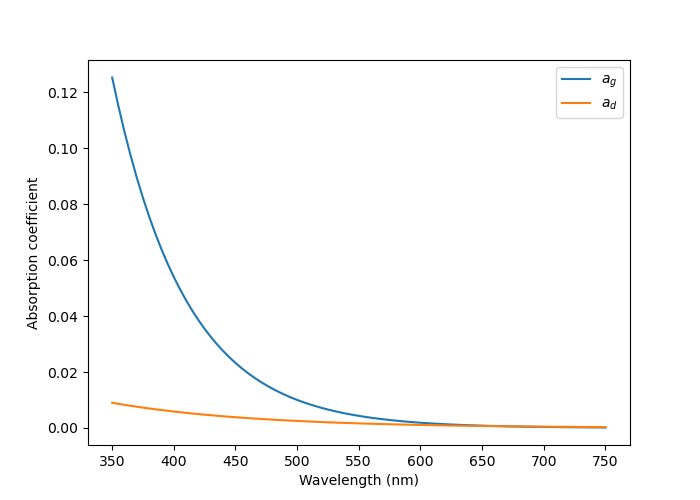

In [7]:
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
ax.plot(L23_wave, ag, label=r'$a_g$')
ax.plot(L23_wave, ad, label=r'$a_d$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorption coefficient')
ax.legend()
#
plt.show()

## Calculate from ds

In [8]:
i400 = np.argmin(np.abs(L23_wave-405.))
i400

11

In [9]:
L23_CDOM = ds.ag[:,i400].data

## Compare to NMF

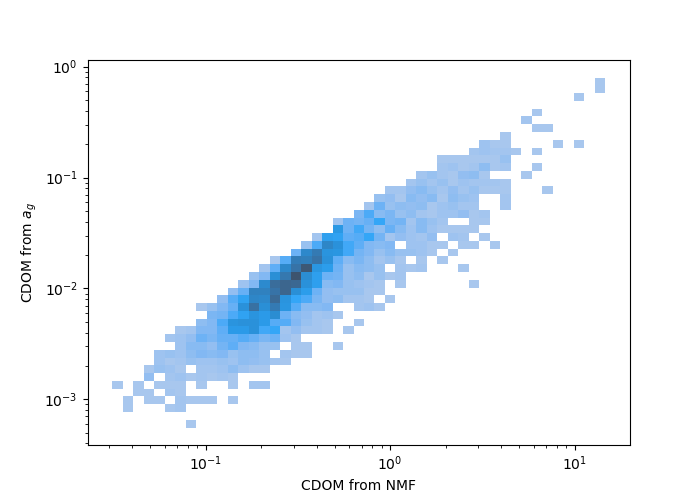

In [10]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#
ax = sns.histplot(x=L23_NMF_CDOM, y=L23_CDOM, log_scale=True)
#
ax.set_xlabel('CDOM from NMF')
ax.set_ylabel(r'CDOM from $a_g$')
#ax.legend()
#
plt.show()

# Examine a few profiles

## Low

In [11]:
ilow = np.argmin(np.abs(L23_CDOM-0.001))
ilow

519

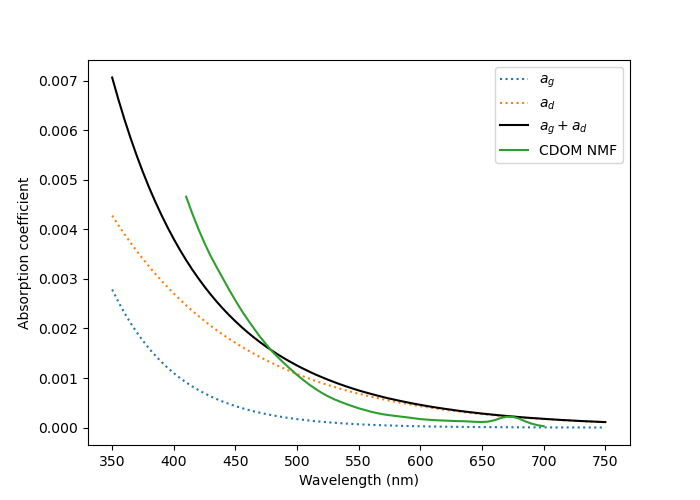

In [12]:
ag = ds.ag.data[ilow,:]
ad = ds.ad.data[ilow,:]

cdom_NMF = L23_M[0] * L23_NMF_CDOM[ilow]

fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
ax.plot(L23_wave, ag, ':', label=r'$a_g$')
ax.plot(L23_wave, ad, ':', label=r'$a_d$')
ax.plot(L23_wave, ad+ag, 'k', label=r'$a_g + a_d$')
ax.plot(L23_NMF_wave, cdom_NMF, label='CDOM NMF')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorption coefficient')
ax.legend()
#
plt.show()

# Compare to combined $a_g + a_d$

In [13]:
L23_NAP =  ds.ag[:,i400].data + ds.ad[:,i400].data

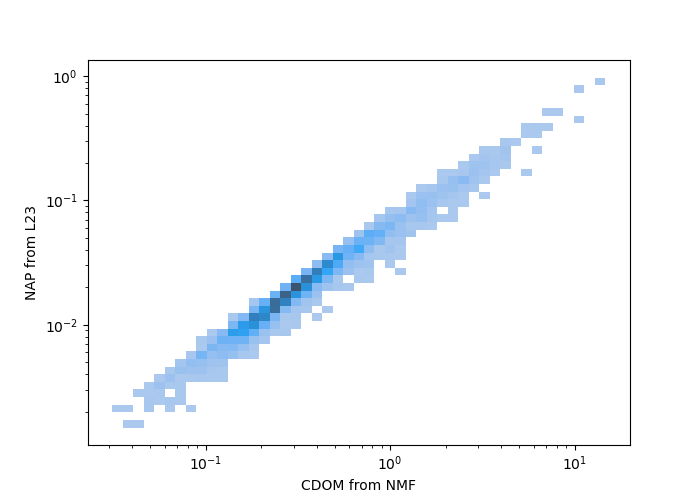

In [14]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#
ax = sns.histplot(x=L23_NMF_CDOM, y=L23_NAP, log_scale=True)
#
ax.set_xlabel('CDOM from NMF')
ax.set_ylabel(r'NAP from L23')
#ax.legend()
#
plt.show()